In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [39]:
import cooltools
import cooler 

In [40]:
data_dir='/pollard/home/shzhang/akita/akdemir_collab/colab_fasta/'

In [41]:
#cooler.fileops.list_coolers(f'{data_dir}235874-WG01_walk_12_EGFR_containing.mcool')
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
#'235915-WG01_walk_4_EGFR_containing.mcool'
cooler.fileops.list_coolers(data_dir + '235890-WG01_walk_11_MDM2_containing.mcool')

['/resolutions/1000',
 '/resolutions/5000',
 '/resolutions/10000',
 '/resolutions/25000',
 '/resolutions/50000',
 '/resolutions/100000',
 '/resolutions/250000',
 '/resolutions/500000',
 '/resolutions/1000000',
 '/resolutions/2500000']

In [47]:
clr = cooler.Cooler(f'{data_dir}/235890-WG01_walk_11_MDM2_containing.mcool::resolutions/1000')

### to print chromosomes and binsize for this cooler
print(f'chromosomes: {clr.chromnames}, binsize: {clr.binsize}')

### to make a list of chromosome start/ends in bins:
chromstarts = []
for i in clr.chromnames:
    #print(f'{i} : {clr.extent(i)}')
    chromstarts.append(clr.extent(i)[0])

chromosomes: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X', 'Y', 'M', 'GL000008.2', 'GL000009.2', 'GL000194.1', 'GL000195.1', 'GL000205.2', 'GL000208.1', 'GL000213.1', 'GL000214.1', 'GL000216.2', 'GL000218.1', 'GL000219.1', 'GL000220.1', 'GL000221.1', 'GL000224.1', 'GL000225.1', 'GL000226.1', 'KI270302.1', 'KI270303.1', 'KI270304.1', 'KI270305.1', 'KI270310.1', 'KI270311.1', 'KI270312.1', 'KI270315.1', 'KI270316.1', 'KI270317.1', 'KI270320.1', 'KI270322.1', 'KI270329.1', 'KI270330.1', 'KI270333.1', 'KI270334.1', 'KI270335.1', 'KI270336.1', 'KI270337.1', 'KI270338.1', 'KI270340.1', 'KI270362.1', 'KI270363.1', 'KI270364.1', 'KI270366.1', 'KI270371.1', 'KI270372.1', 'KI270373.1', 'KI270374.1', 'KI270375.1', 'KI270376.1', 'KI270378.1', 'KI270379.1', 'KI270381.1', 'KI270382.1', 'KI270383.1', 'KI270384.1', 'KI270385.1', 'KI270386.1', 'KI270387.1', 'KI270388.1', 'KI270389.1', 'KI270390.1', 'KI270391.1', 'KI27039

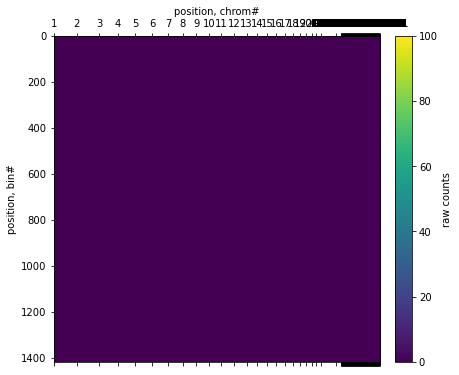

In [46]:
f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow((clr.matrix(balance=False)[:]),vmax=100);
plt.colorbar(im ,fraction=0.046, pad=0.04, label='raw counts')
ax.set(xticks=chromstarts, xticklabels=clr.chromnames,
       xlabel='position, chrom#', ylabel='position, bin#')
ax.xaxis.set_label_position('top')

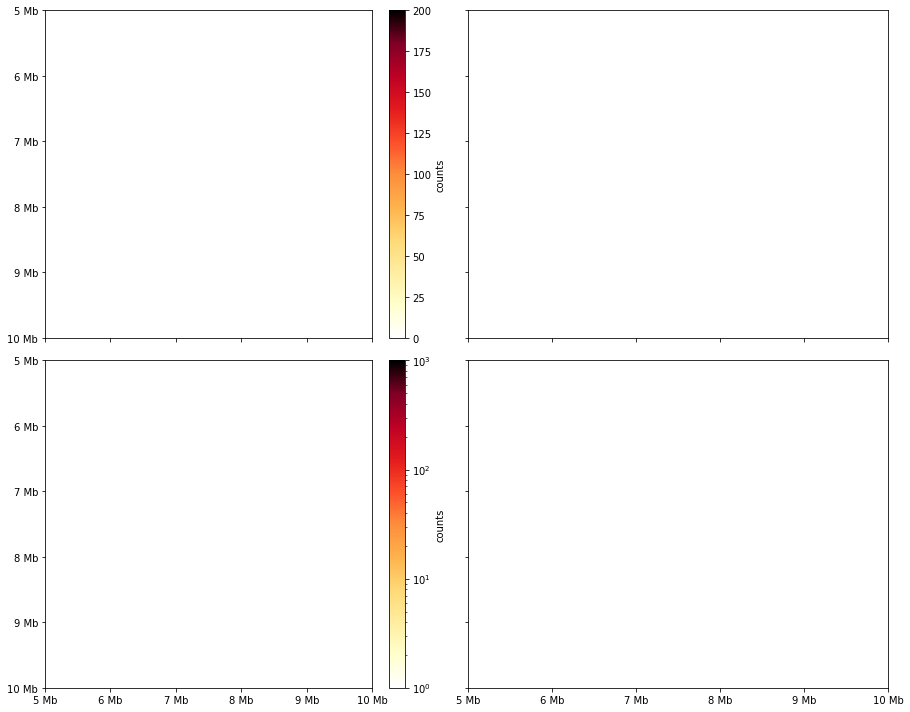

In [50]:
### plot the corrected data in fall heatmap ###
import cooltools.lib.plotting
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import EngFormatter

bp_formatter = EngFormatter('b')

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)
        


fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)



chrom='12'
start=5e6
end=10e6
region = (chrom, start, end)

extents = (start, end, end, start)
norm = LogNorm(vmin=1, vmax=1000)

f, axs = plt.subplots(
    figsize=(13, 10),
    nrows=2,
    ncols=2,
    sharex=True,
    sharey=True
)

ax = axs[0, 0]
im = ax.matshow(
    clr.matrix(balance=False).fetch(region),
    cmap='fall',
    #cmap=fruitpunch,
    vmax=200,
    extent=extents
);
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='counts');

ax = axs[1, 0]
im = ax.matshow(
    clr.matrix(balance=False).fetch(region),
    cmap='fall',
    #cmap=fruitpunch,
    norm=norm,
    extent=extents
);
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='counts');


for ax in axs.ravel():
    format_ticks(ax, rotate=False)
plt.tight_layout()